In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from random import random
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Considerations

These models need an higher granularity than a measure for 20 sec due to capture a signal of sudden change


In [2]:
heartrate_df = pd.read_csv ('.\Data\heartrate_23July.txt', sep='\t', header=0)

In [3]:
timestamps = heartrate_df.loc[:,"time"].tolist()
heartrates = heartrate_df.loc[:,"heartRate"].tolist()
timestamps = timestamps[:]
heartrates = heartrates[:]

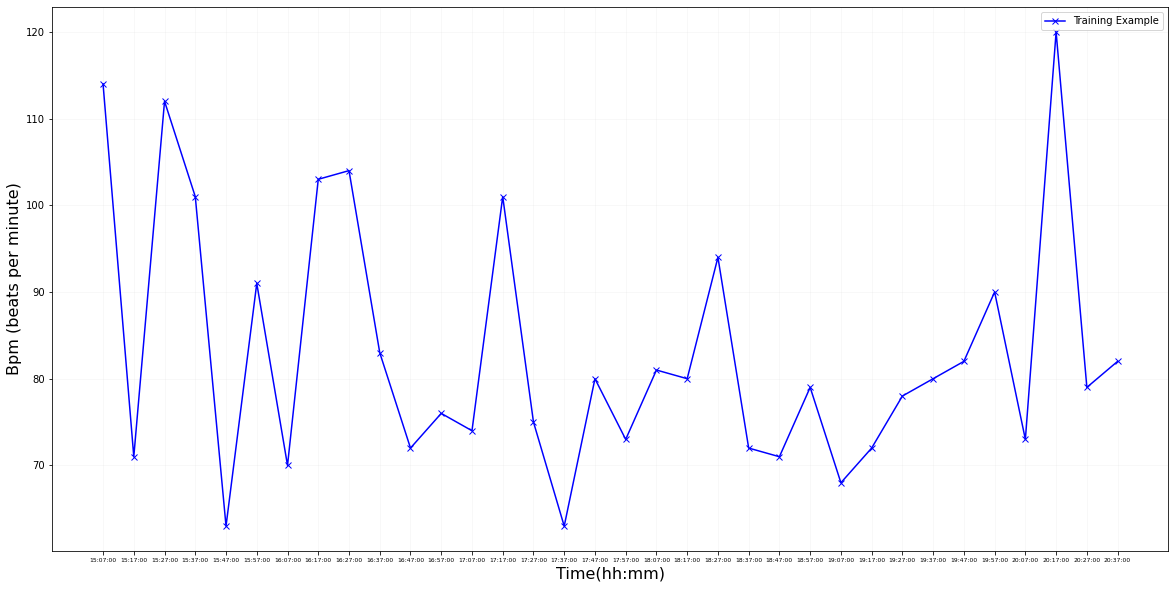

In [4]:
plt.figure(figsize = (20,10)) # declaire environment to draw
# (12,5) = (columns,rows)
plt.plot(timestamps,heartrates, marker='x', c='blue', label='Training Example')
plt.xlabel("Time(hh:mm)", fontsize=16)
plt.ylabel("Bpm (beats per minute)", fontsize=16)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=10)
plt.grid(alpha=0.1)
plt.legend()
plt.show()

# AUTO REGRESSION

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [7]:
model = AutoReg(heartrates, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[82.3]


# Moving Average (MA)

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components

In [6]:

# fit model
model = ARIMA(heartrates, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[83.2]


# Autoregressive Moving Average (ARMA)


The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [7]:
# fit model
model = ARIMA(heartrates, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[85.]


C:\Users\apanico\Miniconda3\envs\football\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\apanico\Miniconda3\envs\football\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# Autoregressive Integrated Moving Average (ARIMA)

 The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function 
 of the differenced observations and residual errors at prior time steps.
 It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components

In [8]:
# fit model
model = ARIMA(heartrates, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates), typ='levels')
print(np.round(yhat,1))

[85.4]


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

In [9]:
# fit model
model = SARIMAX(heartrates, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[85.4]


# Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [10]:
from random import random
# contrived dataset
data2 = [x + random() for x in range(0, len(heartrates))]
# fit model
model = SARIMAX(heartrates, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(heartrates), len(heartrates), exog=[exog2])
print(np.round(yhat,1))

[45.4]


# Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [11]:
# fit model
# fit model
model = SimpleExpSmoothing(heartrates)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[83.1]


# Holt Winter’s Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

In [12]:
# fit model
model = ExponentialSmoothing(heartrates)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(heartrates), len(heartrates))
print(np.round(yhat,1))

[83.1]
